** Regression anaysis**

- Regression goal is to predict continous valued outcome from the given data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Data1=pd.read_csv('https://raw.githubusercontent.com/Abeyaantrix2Internship/intern/main/FuelConsumption.csv')
Data1.head()

MODELYEAR   MAKE  ... FUELCONSUMPTION_COMB_MPG CO2EMISSIONS
0       2014  ACURA  ...                       33          196
1       2014  ACURA  ...                       29          221
2       2014  ACURA  ...                       48          136
3       2014  ACURA  ...                       25          255
4       2014  ACURA  ...                       27          244

[5 rows x 13 columns]

In [ ]:
Data2=pd.read_csv('https://raw.githubusercontent.com/Abeyaantrix2Internship/intern/main/Salary_Data.csv')
Data2.head()

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

- Regression Can be Linear or non linear

- linear regression is most widely used type of regression
 
- the assumption in the case of linear regression is that, the data is linear, there is linear relationship exist between input and output

- Linear relationship b/w 2 variables can be started  as the change in the value (Increase or Decrease in Value) of the dependent variable is in accordance to change in the value of Independent variable

- When we use one variable (single feature) to predict continous valued outcome, we call it as simple linear regression

 EX- 
1. predicting Salary Based on Years of Experience
2. predict co2 Emission Based on Engine size
- similarly, when more than one variable (independent Variables) are used to predict regression  outcome  (dependent variable) we call it as multilinear regression (Multivariable regression)

 EX-
 1. predicting salary on Years of Experience, Degree, Age ETC...
 2. Predict CO2 Emission based on Engine Size ,No of Cylinders, FuelType Etc...

- Math matically the liear relationship b/w dependent variable and independent variable is given by 

 - Y= mX+C

 - Y- dependent variable

 - X- independent variable (s) (x1,x2,x3,x4...xn) (response Variable)

 - m - regression coefficient,slope

 - c- constant,Intercept

- The linear relationship can be +ve or -ve

*** To Find out the cofficients 2 Main methods is used ***

1. Ordinary least Square method it is formula based based

2. With the help of Gradient Descent Optimization , Which is a trial and error method (wwhich uses partial differential error to minimize error in choosing the best co-efficient

In [ ]:
Data=pd.read_csv('https://raw.githubusercontent.com/Abeyaantrix2Internship/intern/main/Salary_Data.csv')
Data.head()

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

In [ ]:
Data.shape

(30, 2)

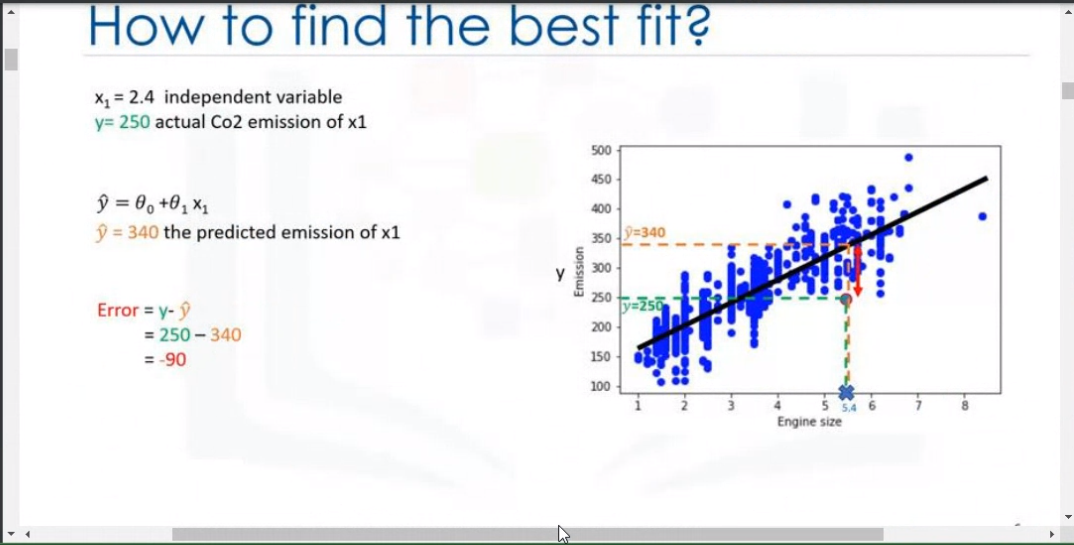

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/Machine Learning/images/Best fit line.png')

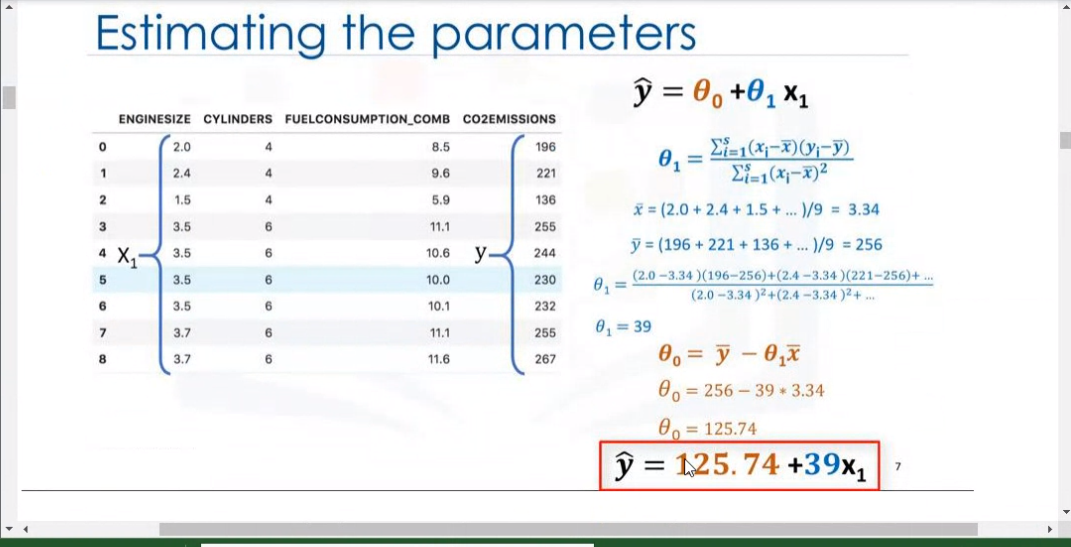

In [ ]:
Image('/content/drive/MyDrive/Machine Learning/images/Screenshot (19).png')

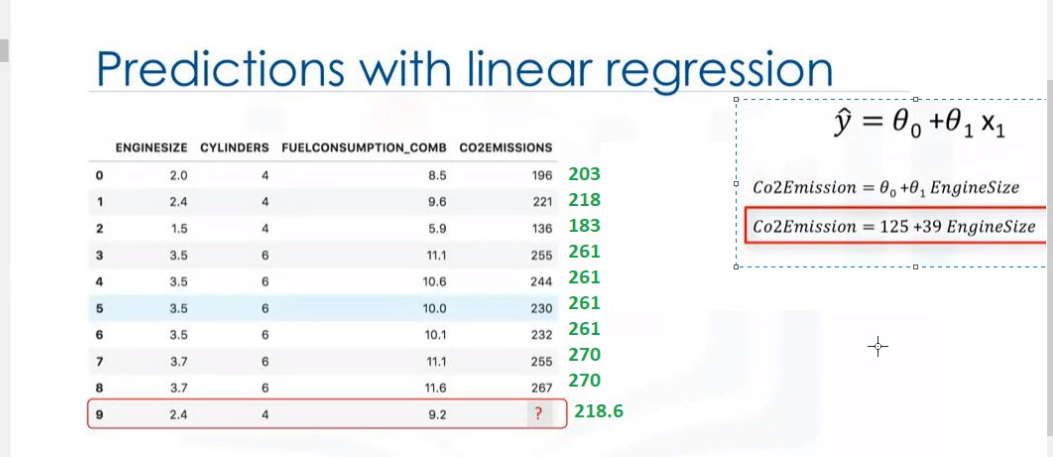

In [ ]:
Image('/content/drive/MyDrive/Machine Learning/images/Screenshot (103).png')

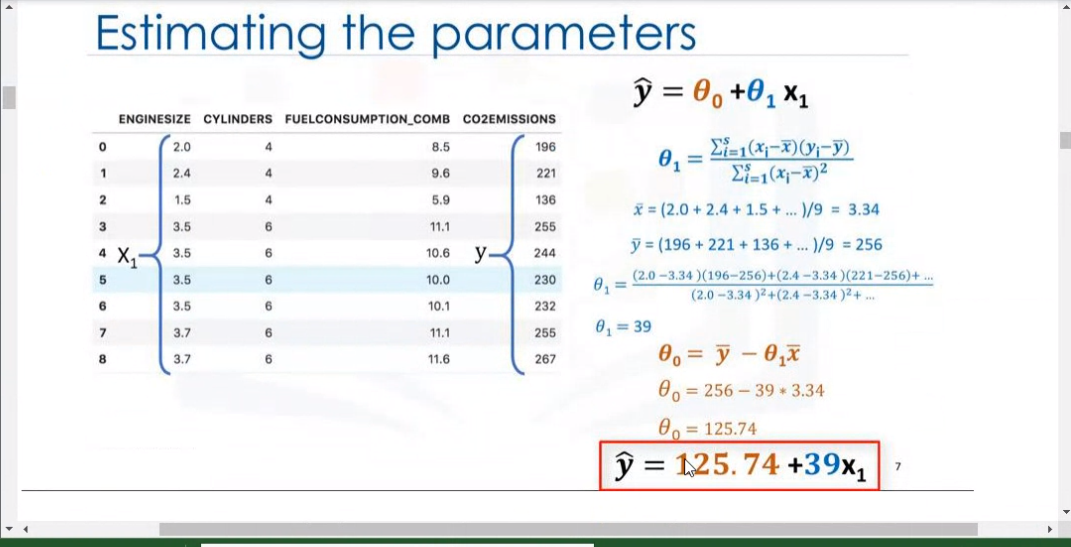

In [ ]:
Image('/content/drive/MyDrive/Machine Learning/images/Screenshot (19).png')

*** To Build Regression model Follow these steps***

1. Explore the Data (Exploratory Data Analysis)
2. split data into dependent and independent variable
2. To Build linear Regression plot the data and verify is data linear or not?
3. Data cleaning
4. Feature engineering,( Train test Split)
5. Build linear regression model on training data
6. Verify results in test data

In [ ]:
# EDA
print(Data.shape)
print(Data.isnull().sum())

(30, 2)
YearsExperience    0
Salary             0
dtype: int64


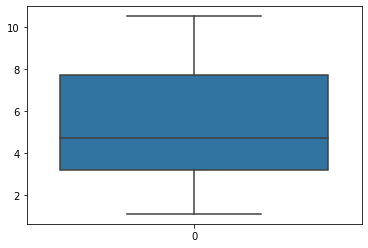

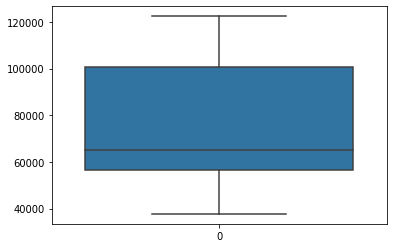

In [ ]:
#plt.figure(figsize=(5,10))
sns.boxplot(data=Data.YearsExperience)
plt.show()
sns.boxplot(data=Data.Salary)

There are no missing Values present in given data and also by looking at data we can say no categorical data present no need to clean the data

In [ ]:
Data.describe()

YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000

median experience is 4.7 years and avg experience is 5,3 years both almost close
- minimum and max year of service is 1.1 years to 10.5 years
- minimum salary is 37731 and max salary 122391

In [ ]:
# split data into dependent and indipendent variable
X1 = Data.YearsExperience #independent variable
Y1 = Data.Salary# dependent variable
print(Y1.shape, X1.shape)
print(Y1.ndim)

(30,) (30,)
1


In [ ]:
# split data into dependent and indipendent variable
X2 = Data.iloc[:,0] #here also one column but store in 1D array
Y2 = Data.iloc[:,-1]# here also one column but store in 1D array
print(Y2.shape, X2.shape)
print(Y2.ndim)

(30,) (30,)
1


In [ ]:
# split data into dependent and indipendent variable but keep them in column order(2D array)
X = Data.iloc[:,0:1] #here also one column but store in 2D array
Y = Data.iloc[:,-1:]# here also one column but store in 2D array
print(Y.shape, X.shape)
print(Y.ndim)

(30, 1) (30, 1)
2


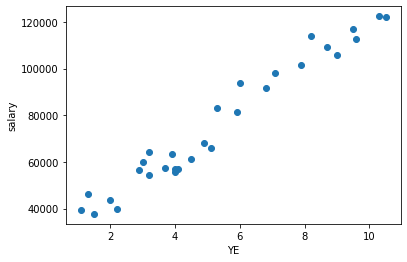

In [ ]:
# verify data is linear is linear or not
# scatterplot
plt.scatter(x=Data.YearsExperience,y=Data.Salary)
plt.xlabel('YE')
plt.ylabel('salary')
plt.show()

In [ ]:
# datacleaning is not required for this example

In [ ]:
# Feature enggineering
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.25, random_state=0)
# test size 0.25 indicates test data 25% of the origina , 75% for the training set
# random_state: if wee set random state value we can have same kind shuffling next time wee run the code
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(22, 1) (8, 1)
(22, 1) (8, 1)


In [ ]:
# Build linear regression model on training data
from sklearn.linear_model import LinearRegression #step 1
# step-2 create the linear regression object
LR= LinearRegression()
# Apply LR onto training data
LR.fit(X_train, Y_train)# this step finds the theta0 and theta1 values , finds the best fit line for the training data
# intercept and slope , coefficient
#here LR will be called trained model, using this trained model we can predict any model on any given data relative to data being trained

LinearRegression()

- When we have only one feature , we need to make sure this data is in a single column(2D array format) 
- otherwise ML model will not be able perform operations
- either reshape data
- or while reading it self makesure it will be in 2D format

In [ ]:
LR.coef_

array([[9379.71049195]])

In [ ]:
LR.intercept_

array([26986.69131674])

In [ ]:
#salary=YE*Theta1 + theta0 
#Salary = 9380*YE +26987

In [ ]:
# use the enginesize as independent variable and co2 emission as dependent variable
# build LR model follow the steps

In [ ]:
YE=4.5
Salary=9380*YE+26987 #predicted 
print(Salary)
#But the salary of 4.5 YE is 61111 in the data there is a error. but we need to train it with multiple samples i,e test data

69197.0


In [ ]:
print(X_test)
print(Y_test)

    YearsExperience
2               1.5
28             10.3
13              4.1
10              3.9
26              9.5
24              8.7
27              9.6
11              4.0
      Salary
2    37731.0
28  122391.0
13   57081.0
10   63218.0
26  116969.0
24  109431.0
27  112635.0
11   55794.0


In [ ]:
Y_predicted=LR.predict(X_test)
Y_predicted

array([[ 41056.25705466],
       [123597.70938378],
       [ 65443.50433372],
       [ 63567.56223533],
       [116093.94099022],
       [108590.17259667],
       [117031.91203942],
       [ 64505.53328452]])

In [ ]:
print('Y actual:', Y_test)

Y actual:       Salary
2    37731.0
28  122391.0
13   57081.0
10   63218.0
26  116969.0
24  109431.0
27  112635.0
11   55794.0


In [ ]:
#residual error diff b/w actual and predicted value
Y_predicted-Y_test # error of each sample in test data

Salary
2   3325.257055
28  1206.709384
13  8362.504334
10   349.562235
26  -875.059010
24  -840.827403
27  4396.912039
11  8711.533285

In [ ]:
### Overall how to compare
# sum of mean square error
# Mean Squared error

from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(Y_predicted,Y_test)
print(MSE)
print(np.sqrt(MSE))# error in Average 

22407940.143340684
4733.70258289858


In [ ]:
#print(LR.evaluate(Y_predicted))

**Plotting Training and Test data on Regression line(Best fit line)**

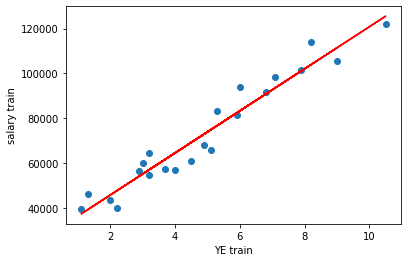

In [ ]:
#bestfit line for train data
plt.scatter(x= X_train,y=Y_train)
plt.plot(X_train,LR.predict(X_train),'r')# best fit line
plt.xlabel('YE train')
plt.ylabel('salary train')
plt.show()

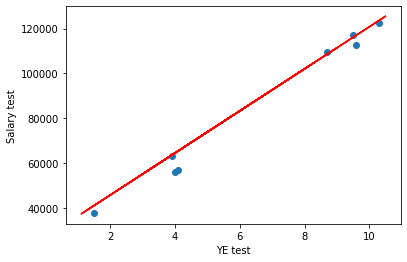

In [ ]:
#bestfit line for train data
plt.scatter(x= X_test,y=Y_test)
plt.plot(X_train,LR.predict(X_train),'r')# best fit line
plt.xlabel('YE test')
plt.ylabel('Salary test')
plt.show()

Example NO 2= for simple linear regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

df = pd.read_csv('https://raw.githubusercontent.com/Abeyaantrix2Internship/intern/main/FuelConsumption.csv')
df.head()

MODELYEAR   MAKE  ... FUELCONSUMPTION_COMB_MPG CO2EMISSIONS
0       2014  ACURA  ...                       33          196
1       2014  ACURA  ...                       29          221
2       2014  ACURA  ...                       48          136
3       2014  ACURA  ...                       25          255
4       2014  ACURA  ...                       27          244

[5 rows x 13 columns]

In [ ]:
df.ndim

2

In [ ]:
df.shape

(1067, 13)

In [ ]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [ ]:
X=df.loc[:,['ENGINESIZE']] #df.ENGINESIZE
Y=df.loc[:,['CO2EMISSIONS']] #df.CO2EMISSIONS  
print(X.shape)
print(Y.shape)
print(X.head())
print(Y.head())

(1067, 1)
(1067, 1)
   ENGINESIZE
0         2.0
1         2.4
2         1.5
3         3.5
4         3.5
   CO2EMISSIONS
0           196
1           221
2           136
3           255
4           244


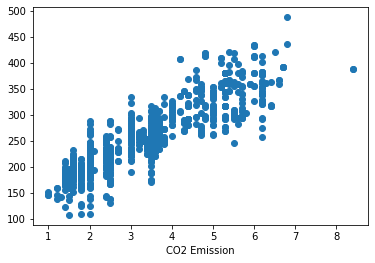

In [ ]:
plt.scatter(x=df.ENGINESIZE,y=df.CO2EMISSIONS)
plt.xlabel('Engine size')
plt.xlabel('CO2 Emission')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.20, random_state=0)
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(853, 1) (214, 1)
(853, 1) (214, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,Y_train)

LinearRegression()

In [ ]:
LR.coef_

array([[39.24838431]])

In [ ]:
LR.intercept_

array([126.18920155])

In [ ]:
Y_predicted=LR.predict(X_test)
Y_predicted

array([[342.05531526],
       [220.3853239 ],
       [220.3853239 ],
       [232.15983919],
       [224.31016233],
       [298.88209252],
       [220.3853239 ],
       [267.48338507],
       [220.3853239 ],
       [322.43112311],
       [267.48338507],
       [393.07821487],
       [243.93435448],
       [298.88209252],
       [181.13693958],
       [283.1827388 ],
       [314.58144625],
       [188.98661645],
       [263.55854664],
       [385.22853801],
       [196.83629331],
       [263.55854664],
       [263.55854664],
       [204.68597017],
       [224.31016233],
       [243.93435448],
       [275.33306193],
       [334.2056384 ],
       [342.05531526],
       [204.68597017],
       [345.9801537 ],
       [224.31016233],
       [263.55854664],
       [243.93435448],
       [196.83629331],
       [188.98661645],
       [349.90499213],
       [220.3853239 ],
       [232.15983919],
       [267.48338507],
       [196.83629331],
       [196.83629331],
       [220.3853239 ],
       [204

In [ ]:
print('Y actual:', Y_test)

Y actual:       CO2EMISSIONS
766            356
204            209
629            230
897            212
711            168
...            ...
822            198
1029           221
798            191
803            184
251            184

[214 rows x 1 columns]


In [ ]:
#residual error diff b/w actual and predicted value
Y_predicted-Y_test # error of each sample in test data
#avoid on larger dataset

CO2EMISSIONS
766     -13.944685
204      11.385324
629      -9.614676
897      20.159839
711      56.310162
...            ...
822       6.685970
1029    -16.314030
798      -2.013384
803       4.986616
251      -2.863060

[214 rows x 1 columns]

In [ ]:
### Overall how to compare
# sum of mean square error
# Mean Squared error

from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(Y_predicted,Y_test)
print(MSE)
print(np.sqrt(MSE))# error in Average 

1181.528809303555
34.37337355139229


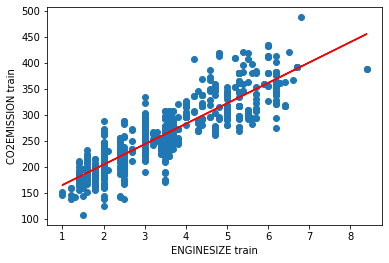

In [ ]:
#bestfit line for train data
plt.scatter(x= X_train,y=Y_train)
plt.plot(X_train,LR.predict(X_train),'r')# best fit line
plt.xlabel('ENGINESIZE train')
plt.ylabel('CO2EMISSION train')
plt.show()

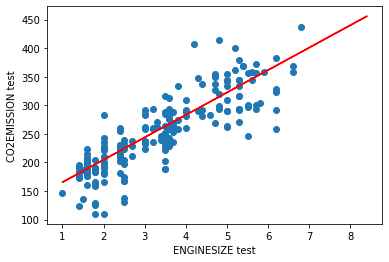

In [ ]:
#bestfit line for train data
plt.scatter(x= X_test,y=Y_test)
plt.plot(X_train,LR.predict(X_train),'r')# best fit line
plt.xlabel('ENGINESIZE test')
plt.ylabel('CO2EMISSION test')
plt.show()

#R-squared can also be used to measure the performance of regression models

- its output lies b/w 0-1 range

- higher the value better is the regression model, but it is not always true

- it is a measure of how much variance is captured by  the LR model

In [ ]:
# in MSE case the outcome is same unit as original data

In [ ]:
## R square value of 1 is highly impossible to achive and mostly if we get R2 as1 it will be an overfit model

In [ ]:
from sklearn.metrics import r2_score
R2= r2_score(Y_predicted,Y_test)
print(R2)

0.6286209384098277


** Computing Simple Linear regression using Stats library **

In [ ]:
import statsmodels.api as ols
# ordinary least squares (ols)
#SLR = ols(Y_train, X_train).fit()
#Y=mX+c
#Y=theta0+theta1*X1
#Y=m0*X0+m1*X1
   #m0-intercept
   #m1= coeff
   #X0= 1
   #X1= input data(independent variable)

#co2emi=mo*1+m1*enginesize
# 1 means it should same as the size of other X value
# for above examples size of X_train
X0=np.ones(X_train.shape)# created array same size as training data
X1=X_train
X=np.append(arr=X0, values=X1, axis=1)#append training data with X0
print(X.shape)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(853, 2)


In [ ]:
SLR = ols.OLS(Y_train, X).fit()# summary of training data
SLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     2929.
Date:                Mon, 14 Feb 2022   Prob (F-statistic):          9.16e-278
Time:                        15:10:38   Log-Likelihood:                -4106.5
No. Observations:                 853   AIC:                             8217.
Df Residuals:                     851   BIC:                             8227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        126.1892      2.634     47.901      0.000     121.019     131.360
x1            39.2484      0.725     54.119      0.000      37.825      40.672
==============================================================================
Omnibus:                       23.883   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.987
Skew:                           0.241   Prob(JB):                     9.30e-09
Kurtosis:                       3.899   Cond. No.                         9.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#summary for the test data
X0=np.ones(X_test.shape)# created array same size as testing data
X1=X_test
X=np.append(arr=X0, values=X1, axis=1)#append testing data with X0
print(X.shape)

(214, 2)


In [ ]:
SLR = ols.OLS(Y_test, X).fit()# summary of testing data
SLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     573.8
Date:                Mon, 14 Feb 2022   Prob (F-statistic):           3.12e-62
Time:                        15:10:38   Log-Likelihood:                -1056.7
No. Observations:                 214   AIC:                             2117.
Df Residuals:                     212   BIC:                             2124.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.7743      5.865     20.764      0.000     110.214     133.335
x1            38.6336      1.613     23.954      0.000      35.454      41.813
==============================================================================
Omnibus:                        7.652   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.022   Jarque-Bera (JB):               13.170
Skew:                          -0.083   Prob(JB):                      0.00138
Kurtosis:                       4.204   Cond. No.                         9.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""